In [1]:
import os

In [2]:
os.getcwd()

'/home/jale/Documents/hydra'

In [3]:
import pandas, numpy
from runners.novelty_experiment_runner_sb import NoveltyExperimentRunnerSB
from os import path
import settings
from runners import constants
import seaborn as sns
import matplotlib.pyplot as plt

importing local settings
/home/jale/miniconda3/envs/hydra/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


# Novelty experiment 

In [4]:
results_file_2 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "novelty_results_2021_6_9.csv"), "r")
dataframe2 = NoveltyExperimentRunnerSB.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_2))


In [5]:
dataframe2

,episode_num,novelty_probability,novelty_threshold,novelty,novelty_characterization,performance,notify_novelty,pass,episode_type,trial_num,novelty_id,trial_type,level,env_config,predicted_novel,TN,FP,TP,FN
0,0,0,1,0,0,54240,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,NaN,False,1,0,0,0
1,1,0,1,0,0,103320,False,Pass,non-novelty-performance,0,1_6_0,unknown,1,NaN,False,1,0,0,0
2,2,0,1,0,0,19420,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,NaN,False,1,0,0,0
3,3,0,1,0,0,35090,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,NaN,False,1,0,0,0
4,4,0,1,0,0,34000,False,Fail,non-novelty-performance,0,1_6_0,unknown,1,NaN,False,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,20,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,NaN,False,0,0,0,1
596,21,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,NaN,False,0,0,0,1
597,22,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,NaN,False,0,0,0,1
598,23,0,1,0,0,0,False,Fail,novelty,23,3_7_23,known,3,NaN,False,0,0,0,1


In [6]:
trials,cdt = NoveltyExperimentRunnerSB.get_trials_summary(dataframe2)
print(trials)
print(cdt)

                                 FN  FP  TN  TP  performance  passed  is_CDT
trial_type novelty_id trial_num                                             
known      1_10_16    16          9   0   5  11      53462.4       6    True
           1_6_12     12          1   0   5  19      34053.2       6    True
           1_7_13     13          5   0   5  15      59996.4      12    True
           1_8_14     14          3   0   5  17      44808.0       6    True
           1_9_15     15          5   0   5  15      46884.0      14    True
           2_10_21    21          1   0   5  19      40607.2       6    True
           2_6_17     17          2   0   5  18      41564.0       6    True
           2_7_18     18          9   0   5  11      46172.8       8    True
           2_8_19     19         20   0   5   0      41615.2       5   False
           2_9_20     20         10   0   5  10      36707.6       4    True
           3_6_22     22         16   0   5   4      37022.0       9    True

In [20]:
metrics = NoveltyExperimentRunnerSB.get_program_metrics(cdt, trials)

print(metrics)

trial_type
known           NaN
unknown    0.166667
Name: M2.1, dtype: float64
             M1  CDT_count        M2      M2.1
trial_type                                    
known       6.1         10  0.833333       NaN
unknown     6.0          7  0.583333  0.166667


# Experiment Results - Pass / No Pass performance of Agent

Text(0, 0.5, 'passed episodes')

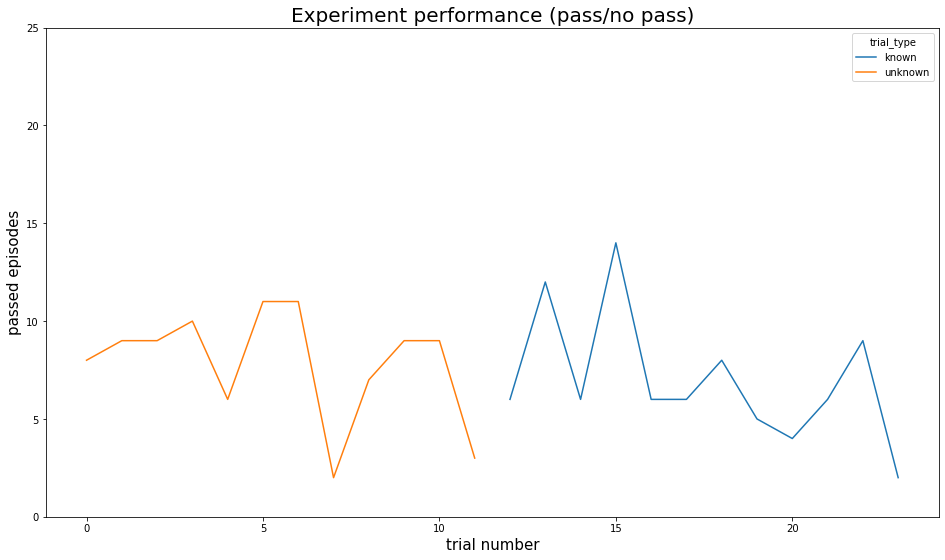

In [16]:
plt.figure(figsize=(16, 9))
ax = sns.lineplot(data=trials, y='passed', x='trial_num', hue='trial_type')
ax.set(ylim=(0, 25))
plt.title("Experiment performance (pass/no pass)", fontsize=20)
plt.xlabel("trial number", fontsize=15)
plt.ylabel("passed episodes", fontsize=15)

# Experiment Results - Rewards

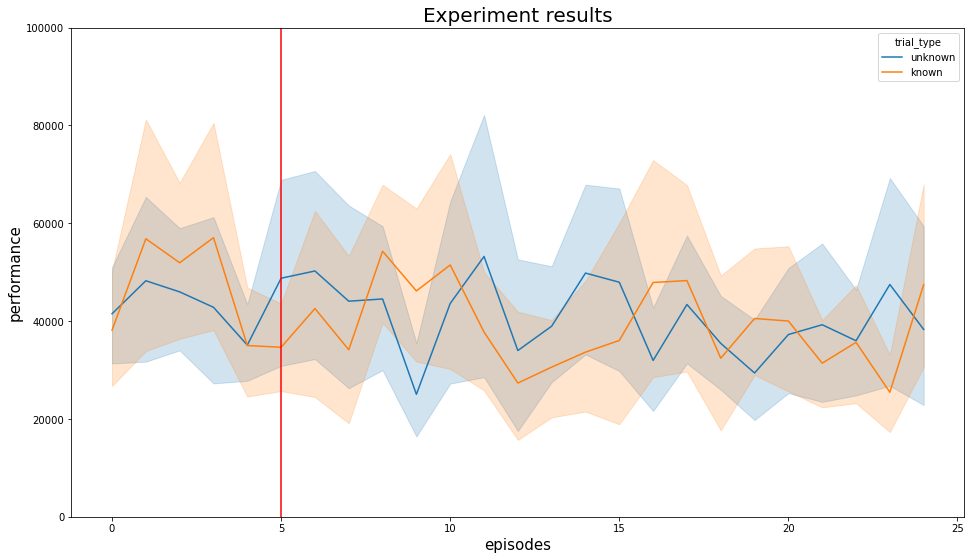

In [8]:
# print(dataframe2)
NoveltyExperimentRunnerSB.plot_experiment_results(dataframe2, 5)

In [9]:
results_file_3 = open(path.join(settings.ROOT_PATH, "runners", "experiments", "ScienceBirds", "SB_experiment", "baseline_performance.csv"), "r")

dataframe3 = NoveltyExperimentRunnerSB.categorize_examples_for_novelty_detection(pandas.read_csv(results_file_3))

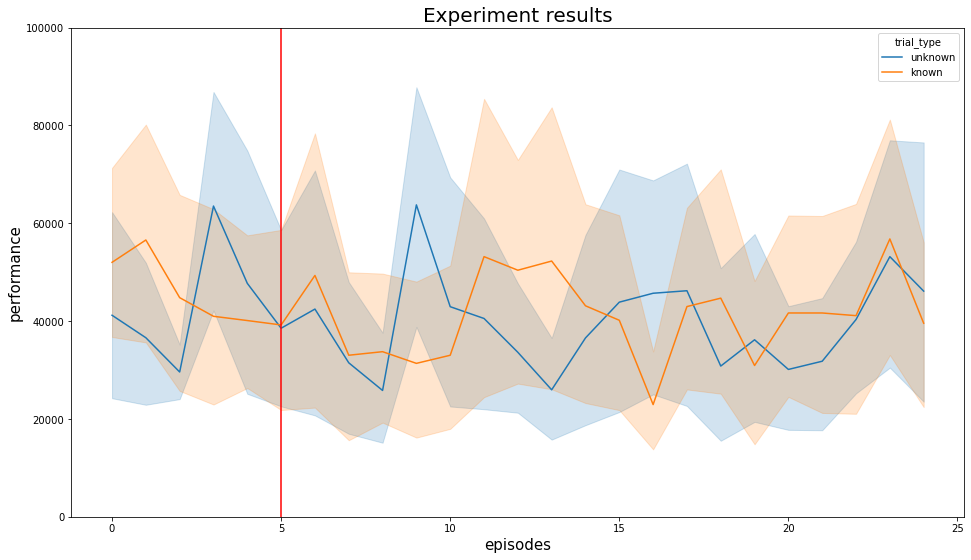

In [10]:
NoveltyExperimentRunnerSB.plot_experiment_results(dataframe3, 5)